# Intro

In [4]:
# import standard python libraries

from __future__ import absolute_import, division, print_function, unicode_literals

import os
import time
import numpy as np
np.set_printoptions(precision=3)
import glob
import matplotlib.pyplot as plt
import PIL
import imageio

from IPython import display

import sklearn

import seaborn as sns;
sns.set(style="ticks", color_codes=True)

import pandas as pd
pd.set_option('precision', 2) # 2 decimal places
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 30)
pd.set_option('display.width', 100) # wide windows

# Pytorch
import torch
import torchvision
print("torch version {}".format(torch.__version__))
if torch.cuda.is_available():
    print(torch.cuda.get_device_name(0))
else:
    print("Torch cannot find GPU")

torch version 1.0.1
Torch cannot find GPU


In [5]:
# JAX (https://github.com/google/jax)
!pip install --upgrade -q https://storage.googleapis.com/jax-releases/cuda$(echo $CUDA_VERSION | sed -e 's/\.//' -e 's/\..*//')/jaxlib-$(pip search jaxlib | grep -oP '[0-9\.]+' | head -n 1)-cp36-none-linux_x86_64.whl
!pip install --upgrade -q jax

# Check we can use it
import jax.numpy as np
A = np.zeros((3,3))

'sed' is not recognized as an internal or external command,
operable program or batch file.


ModuleNotFoundError: No module named 'jaxlib'

In [13]:
%pwd
%cd D:\Github\pyprobml
%pwd    

D:\Github\pyprobml


'D:\\Github\\pyprobml'

In [14]:
# Check we can access scripts and any functions they define
os.chdir('scripts')
import pyprobml_utils as pml
pml.pyprobml_test()

welcome to python probabilistic ML library


# linear algebra

In [71]:
# If we want to make a vector into a matrix with one row, we can use any of the following:

x = np.array([1,2]) # vector
X1 = np.array([x]) # matrix with one row
X2 = np.reshape(x, (1,-1))
X3 = x[None, :]
X4 = x[np.newaxis, :]
assert np.array_equal(X1, X2)
assert np.array_equal(X1, X3)
print(np.shape(X1)) ## (1,2)

# If we want to make a vector into a matrix with one column, we can use any of the following:
x = np.array([1,2]) # vector
X1 = np.array([x]).T # matrix with one column
X2 = np.reshape(x, (-1,1))
X3 = x[:, None]
X4 = x[:, np.newaxis]
assert np.array_equal(X1, X2)
assert np.array_equal(X1, X3)
print(np.shape(X1)) ## (2,1)

(1, 2)
(2, 1)


In [72]:
# cleve way to do one-hot encoding
# Here is how to create a one-hot encoding of integers.

def one_hot(x, k, dtype=np.float32):
  return np.array(x[:, None] == np.arange(k), dtype)


# Example
x = np.array([1,2,0,2]);
X = one_hot(x, 3)
print(X)

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [74]:
# We can flatten a matrix to a vector (concatenating its rows, one by one) using ravel
A = np.reshape(np.arange(6),(2,3))
print(A.ravel()) ##  [0 1 2 3 4 5]

[0 1 2 3 4 5]


In [75]:
onp.random.seed(42)
M = onp.random.randn(4, 4)
A = M  + M.T # ensure symmetric
assert (A == A.T).all() # check symmetric
evals, evecs = np.linalg.eigh(A) # tell JAX matrix is symmetric
#evals, evecs = onp.linalg.eig(A)
print(evals)
print(evecs)

# Sort columns so one with largest evals (absolute value) are first
idx = np.argsort(np.abs(evals))[::-1] # largest first
evecs = evecs[:, idx] # sort columns
evals = evals[[idx]]
print(evals)
print(evecs)

[-3.806 -2.09   1.016  3.353]
[[ 0.277  0.202 -0.824  0.45 ]
 [ 0.246 -0.751 -0.369 -0.489]
 [-0.68   0.316 -0.427 -0.505]
 [-0.633 -0.543 -0.045  0.55 ]]
[-3.806  3.353 -2.09   1.016]
[[ 0.277  0.45   0.202 -0.824]
 [ 0.246 -0.489 -0.751 -0.369]
 [-0.68  -0.505  0.316 -0.427]
 [-0.633  0.55  -0.543 -0.045]]


In [76]:
# Power method
from numpy.linalg import norm

onp.random.seed(0)

def power_method(A, max_iter=100, tol=1e-5):
    n = np.shape(A)[0]
    u = onp.random.rand(n)
    converged = False
    iter = 0
    while (not converged) and (iter < max_iter):
        old_u = u
        u = np.dot(A, u)
        u = u / norm(u)
        lam = np.dot(u, np.dot(A, u))
        converged = (norm(u - old_u) < tol)
        iter += 1
    return lam, u

X = onp.random.randn(10, 5)
A = np.dot(X.T, X) # psd matrix
lam, u = power_method(A)

evals, evecs = np.linalg.eigh(A)
idx = np.argsort(np.abs(evals))[::-1] # largest first
evals = evals[[idx]]
evecs = evecs[:,idx]

tol = 1e-3
assert np.allclose(evecs[:,0], u, tol)

In [ ]:
# Singular value decomposition (SVD) 
onp.random.seed(0)

A = onp.random.randn(10, 5)

U, S, V = np.linalg.svd(A,full_matrices=False)
print("Full=False: shape of U {}, S {}, V {}".format(U.shape, S.shape, V.shape))

U, S, V = np.linalg.svd(A,full_matrices=True)
print("Full=True: shape of U {}, S {}, V {}".format(U.shape, S.shape, V.shape))

In [77]:
# LU decomposition 
onp.random.seed(42)
A = onp.random.randn(5,5)
L, U = scipy.linalg.lu(A, True)
print(L)
print(U)

[[ 0.339 -0.04   0.733  1.     0.   ]
 [-0.16   1.     0.     0.     0.   ]
 [-0.316 -0.348  0.597 -0.423  1.   ]
 [-0.384 -0.712  1.     0.     0.   ]
 [ 1.     0.     0.     0.     0.   ]]
[[ 1.466 -0.226  0.068 -1.425 -0.544]
 [ 0.     1.543  0.778 -0.697  0.456]
 [ 0.     0.     0.895 -1.951 -1.297]
 [ 0.     0.     0.     3.409  0.919]
 [ 0.     0.     0.     0.    -0.576]]


In [78]:
# QR decomposition 
# Economy vs full mode

onp.random.seed(42)
A = onp.random.randn(5,3)
Q, R = scipy.linalg.qr(A, mode='economic')
print("economy: Q shape {}, R shape {}".format(Q.shape, R.shape))
print(Q)
print(R)


Q, R = scipy.linalg.qr(A, mode='full')
print("full: Q shape {}, R shape {}".format(Q.shape, R.shape))
print(Q)
print(R)
assert np.allclose(np.eye(5), np.dot(Q, Q.T), atol=1e-3)

economy: Q shape (5, 3), R shape (3, 3)
[[-0.213 -0.068  0.765]
 [-0.655 -0.119  0.303]
 [-0.679  0.35  -0.49 ]
 [-0.233 -0.221  0.004]
 [-0.104 -0.9   -0.29 ]]
[[-2.327 -0.031  0.622]
 [ 0.     2.13   1.474]
 [ 0.     0.     1.152]]
full: Q shape (5, 5), R shape (5, 3)
[[-0.213 -0.068  0.765 -0.018  0.604]
 [-0.655 -0.119  0.303 -0.248 -0.635]
 [-0.679  0.35  -0.49  -0.046  0.418]
 [-0.233 -0.221  0.004  0.943 -0.085]
 [-0.104 -0.9   -0.29  -0.215  0.222]]
[[-2.327 -0.031  0.622]
 [ 0.     2.13   1.474]
 [ 0.     0.     1.152]
 [ 0.     0.     0.   ]
 [ 0.     0.     0.   ]]


In [79]:
# Cholesky decomposition ¶
# Sample from multivariate Gaussian

from scipy.stats import multivariate_normal as mvn

def sample_mvn(mu, Sigma, N):
    L = np.linalg.cholesky(Sigma)
    D = len(mu)
    Z = onp.random.randn(N, D)
    X = np.dot(Z, L.T) + np.reshape(mu, (-1,D))
    return X

D = 5
onp.random.seed(42)
mu = onp.random.randn(D)
A = onp.random.randn(D,D)
Sigma = np.dot(A, A.T)
N = 10000
X = sample_mvn(mu, Sigma, N)
mu_hat = np.mean(X)
C = onp.cov(X, rowvar=False) # not yet implemented by jax
print(C)
print(Sigma)
assert np.allclose(C, Sigma, 1e-0) # not that close, even after 10k samples...

dist = mvn(mu, Sigma)
X = dist.rvs(size=N)
C = onp.cov(X, rowvar=False)
assert np.allclose(C, Sigma, 1e-0)

[[ 3.762 -0.445 -1.572 -0.246 -1.439]
 [-0.445  7.072  4.914  3.109  2.191]
 [-1.572  4.914  4.203  1.467  2.151]
 [-0.246  3.109  1.467  4.522  1.431]
 [-1.439  2.191  2.151  1.431  1.896]]
[[ 3.652 -0.479 -1.567 -0.274 -1.432]
 [-0.479  7.126  4.982  3.107  2.228]
 [-1.567  4.982  4.26   1.488  2.179]
 [-0.274  3.107  1.488  4.53   1.462]
 [-1.432  2.228  2.179  1.462  1.924]]


# Exploratory data analysis

In [17]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Year', 'Origin', 'Name']
df = pd.read_csv(url, names=column_names, sep='\s+', na_values="?")

# The last column (name) is a unique id for the car, so we drop it
df = df.drop(columns=['Name'])

df.info()

#Ensure same number of rows for all features.
df = df.dropna()
df.info()
# Summary statistics
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
MPG             398 non-null float64
Cylinders       398 non-null int64
Displacement    398 non-null float64
Horsepower      392 non-null float64
Weight          398 non-null float64
Acceleration    398 non-null float64
Year            398 non-null int64
Origin          398 non-null int64
dtypes: float64(5), int64(3)
memory usage: 25.0 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
MPG             392 non-null float64
Cylinders       392 non-null int64
Displacement    392 non-null float64
Horsepower      392 non-null float64
Weight          392 non-null float64
Acceleration    392 non-null float64
Year            392 non-null int64
Origin          392 non-null int64
dtypes: float64(5), int64(3)
memory usage: 27.6 KB


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
count,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00
mean,23.45,5.47,194.41,104.47,2977.58,15.54,75.98,1.58
std,7.81,1.71,104.64,38.49,849.40,2.76,3.68,0.81
min,9.00,3.00,68.00,46.00,1613.00,8.00,70.00,1.00
25%,17.00,4.00,105.00,75.00,2225.25,13.78,73.00,1.00
50%,22.75,4.00,151.00,93.50,2803.50,15.50,76.00,1.00
75%,29.00,8.00,275.75,126.00,3614.75,17.02,79.00,2.00
max,46.60,8.00,455.00,230.00,5140.00,24.80,82.00,3.00


In [19]:
# Convert Origin feature from int to categorical factor
df['Origin'] = df.Origin.replace([1,2,3],['USA','Europe','Japan'])
df['Origin'] = df['Origin'].astype('category')

# Let us check the categories (levels)
print(df['Origin'].cat.categories)

# Let us check the datatypes of all the features
print(df.dtypes)

# Let us inspect the data. We see meaningful names for Origin.
df.tail()

Index(['Europe', 'Japan', 'USA'], dtype='object')
MPG              float64
Cylinders          int64
Displacement     float64
Horsepower       float64
Weight           float64
Acceleration     float64
Year               int64
Origin          category
dtype: object


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,USA
394,44.0,4,97.0,52.0,2130.0,24.6,82,Europe
395,32.0,4,135.0,84.0,2295.0,11.6,82,USA
396,28.0,4,120.0,79.0,2625.0,18.6,82,USA
397,31.0,4,119.0,82.0,2720.0,19.4,82,USA


In [20]:
# Create latex table from first 5 rows 
tbl = df[-5:].to_latex(index=False, escape=False)
print(tbl)

\begin{tabular}{rrrrrrrl}
\toprule
  MPG &  Cylinders &  Displacement &  Horsepower &  Weight &  Acceleration &  Year &  Origin \\
\midrule
 27.0 &          4 &         140.0 &        86.0 &  2790.0 &          15.6 &    82 &     USA \\
 44.0 &          4 &          97.0 &        52.0 &  2130.0 &          24.6 &    82 &  Europe \\
 32.0 &          4 &         135.0 &        84.0 &  2295.0 &          11.6 &    82 &     USA \\
 28.0 &          4 &         120.0 &        79.0 &  2625.0 &          18.6 &    82 &     USA \\
 31.0 &          4 &         119.0 &        82.0 &  2720.0 &          19.4 &    82 &     USA \\
\bottomrule
\end{tabular}



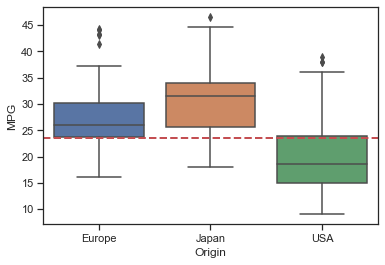

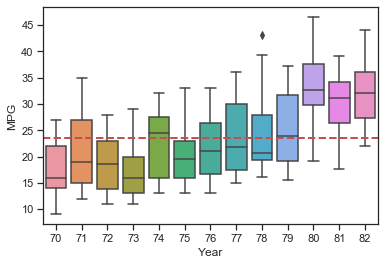

In [22]:
# Plot mpg distribution for cars from different countries of origin
data = pd.concat( [df['MPG'], df['Origin']], axis=1)
fig, ax = plt.subplots()
ax = sns.boxplot(x='Origin', y='MPG', data=data)
ax.axhline(data.MPG.mean(), color='r', linestyle='dashed', linewidth=2)
#plt.savefig(os.path.join(figdir, 'auto-mpg-origin-boxplot.pdf'))
plt.show()

# Plot mpg distribution for cars from different years
data = pd.concat( [df['MPG'], df['Year']], axis=1)
fig, ax = plt.subplots()
ax = sns.boxplot(x='Year', y='MPG', data=data)
ax.axhline(data.MPG.mean(), color='r', linestyle='dashed', linewidth=2)
#plt.savefig(os.path.join(figdir, 'auto-mpg-year-boxplot.pdf'))
plt.show()

In [23]:
# Get the iris dataset and look at it
from sklearn.datasets import load_iris
iris = load_iris()
# show attributes of this object
print(dir(iris))

# Extract numpy arrays
X = iris.data 
y = iris.target
print(np.shape(X)) # (150, 4)
print(np.c_[X[0:3,:], y[0:3]]) # concatenate columns

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']
(150, 4)
[[5.1 3.5 1.4 0.2 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]]


In [24]:
# The data is sorted by class. Let's shuffle the rows.
N = np.shape(X)[0]
rng = np.random.RandomState(42)
perm = rng.permutation(N)
X = X[perm]
y = y[perm]
print(np.c_[X[0:3,:], y[0:3]])

[[6.1 2.8 4.7 1.2 1. ]
 [5.7 3.8 1.7 0.3 0. ]
 [7.7 2.6 6.9 2.3 2. ]]


In [25]:
# Convert to pandas dataframe 
df = pd.DataFrame(data=X, columns=['sl', 'sw', 'pl', 'pw'])
# create column for labels
df['label'] = pd.Series(iris.target_names[y], dtype='category')

# Summary statistics
df.describe(include='all')

,sl,sw,pl,pw,label
count,150.00,150.00,150.00,150.00,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.84,3.06,3.76,1.20,NaN
std,0.83,0.44,1.77,0.76,NaN
min,4.30,2.00,1.00,0.10,NaN
25%,5.10,2.80,1.60,0.30,NaN
50%,5.80,3.00,4.35,1.30,NaN
75%,6.40,3.30,5.10,1.80,NaN


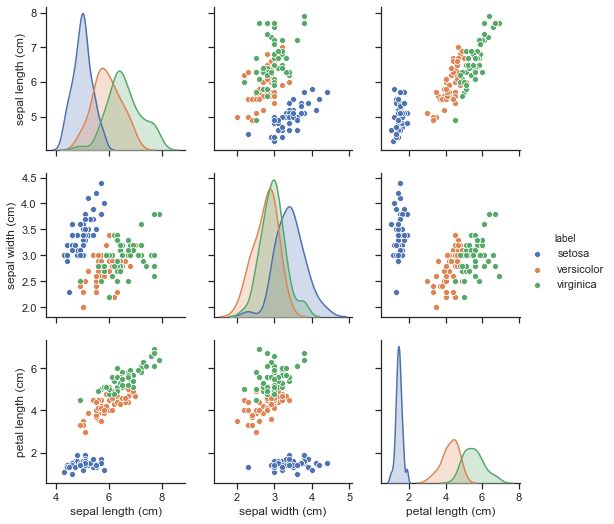

In [26]:
# 2d scatterplot
#https://seaborn.pydata.org/generated/seaborn.pairplot.html
import seaborn as sns;
sns.set(style="ticks", color_codes=True)
# Make a dataframe with nicer labels for printing
#iris_df = sns.load_dataset("iris")
iris_df = df.copy()
iris_df.columns = iris['feature_names'] + ['label'] 
g = sns.pairplot(iris_df, vars = iris_df.columns[0:3] , hue="label")
#save_fig("iris-scatterplot.pdf")
plt.show()

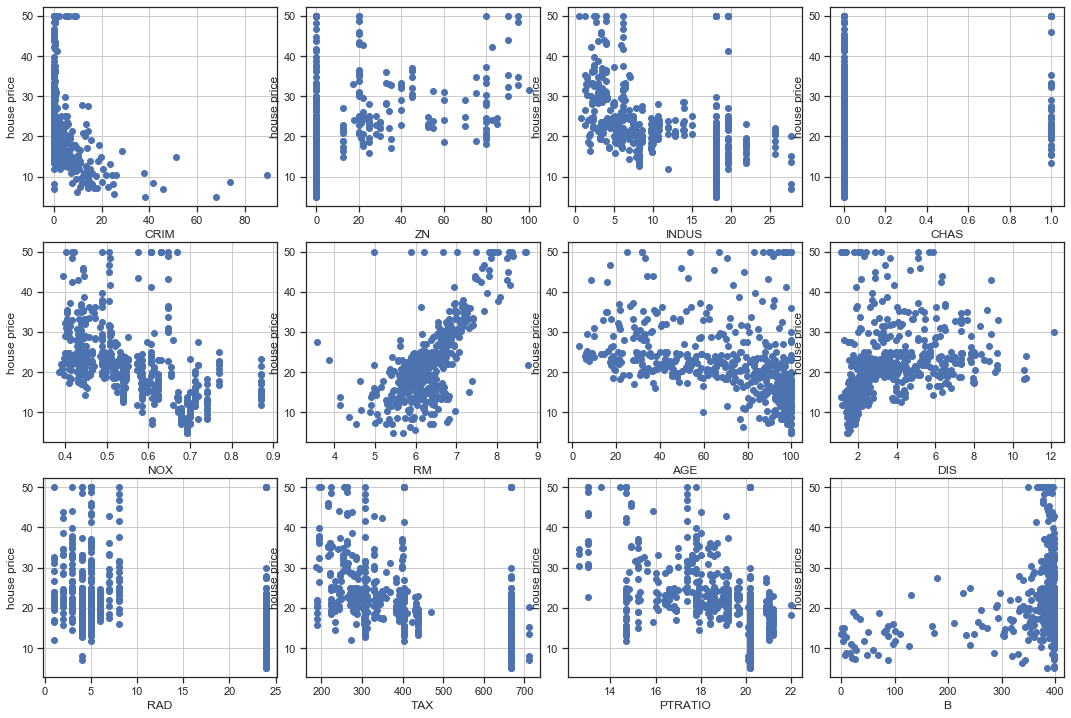

In [27]:
# scatter plot of response vs each feature 
# Load data (creates numpy arrays)
boston = sklearn.datasets.load_boston()
X = boston.data
y = boston.target

# Convert to Pandas format
df = pd.DataFrame(X)
df.columns = boston.feature_names
df['MEDV'] = y.tolist()

df.describe()
nrows = 3; ncols = 4;
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharey=True, figsize=[15, 10])
plt.tight_layout()
plt.clf()
for i in range(0,12):
    plt.subplot(nrows, ncols, i+1)
    plt.scatter(X[:,i], y)
    plt.xlabel(boston.feature_names[i])
    plt.ylabel("house price")
    plt.grid()
#save_fig("boston-housing-scatter.pdf")
plt.show()

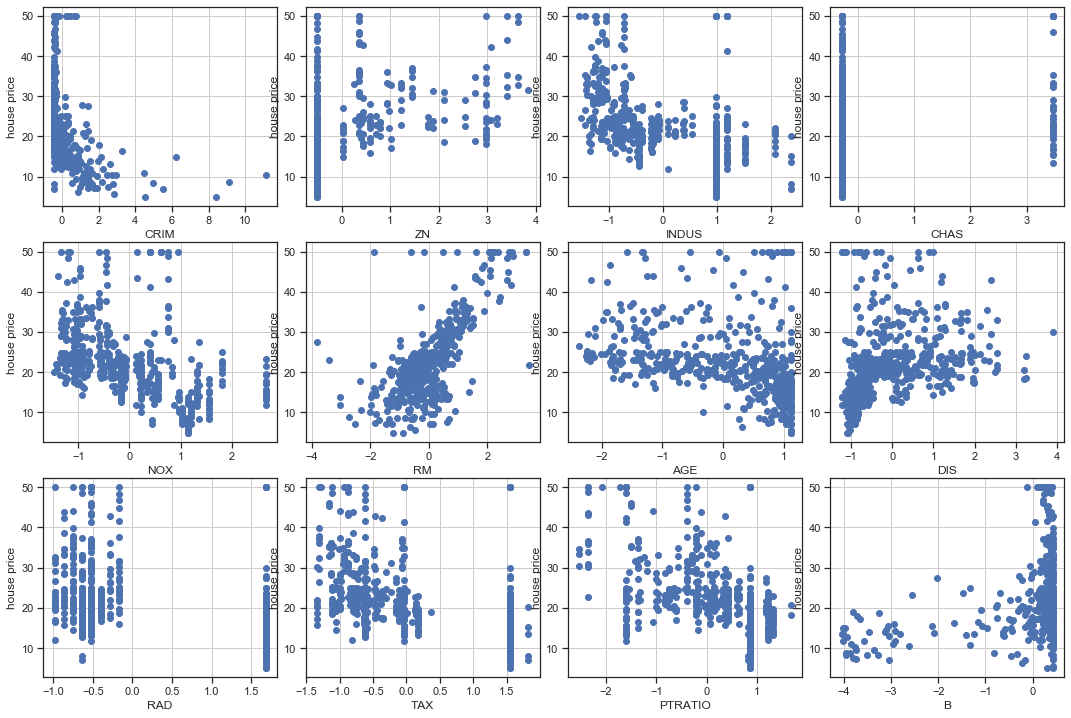

In [28]:
# Data preprocessing
import sklearn.datasets
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split


boston = sklearn.datasets.load_boston()
X = boston.data
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

scaler = sklearn.preprocessing.StandardScaler()
scaler = scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.transform(X) # entire dataset

# scatter plot of response vs each feature.
# The shape of the data looks the same as the unscaled case, but the x-axis of each feature is changed.
nrows = 3; ncols = 4;
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharey=True, figsize=[15,10])
plt.tight_layout()
plt.clf()
for i in range(0,12):
    plt.subplot(nrows, ncols, i+1)
    plt.scatter(X_scaled[:,i], y)
    plt.xlabel(boston.feature_names[i])
    plt.ylabel("house price")
    plt.grid()
#save_fig("boston-housing-scatter-scaled.pdf")
plt.show()

In [30]:
# one hot
# Get data 
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Year', 'Origin', 'Name']
df = pd.read_csv(url, names=column_names, sep='\s+', na_values="?")

# The last column (name) is a unique id for the car, so we drop it
df = df.drop(columns=['Name'])

# Ensure same number of rows for all features.
df = df.dropna()

# Convert origin integer to categorical factor
df['Origin'] = df.Origin.replace([1,2,3],['USA','Europe','Japan'])
df['Origin'] = df['Origin'].astype('category')


df.info()

df.tail()

# Convert origin factor to integer
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
origin_cat = df['Origin']

print('before transform')
print(origin_cat)

origin_int = encoder.fit_transform(origin_cat)
print('after transform')
print(origin_int)

# Make sure we can decode back to strings
print('class names are {}'.format(encoder.classes_))
origin_cat2 = encoder.inverse_transform(origin_int)
print(origin_cat2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
MPG             392 non-null float64
Cylinders       392 non-null int64
Displacement    392 non-null float64
Horsepower      392 non-null float64
Weight          392 non-null float64
Acceleration    392 non-null float64
Year            392 non-null int64
Origin          392 non-null category
dtypes: category(1), float64(5), int64(2)
memory usage: 25.0 KB
before transform
0         USA
1         USA
2         USA
3         USA
4         USA
5         USA
6         USA
7         USA
8         USA
9         USA
        ...  
388       USA
389       USA
390     Japan
391       USA
392       USA
393       USA
394    Europe
395       USA
396       USA
397       USA
Name: Origin, Length: 392, dtype: category
Categories (3, object): [Europe, Japan, USA]
after transform
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 0 0 0 0 0 2 2 2 2 2 1 2 1 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 1 1 0 2 1 2 0 2 2 

In [31]:
# Convert integer encoding to one-hot vectors
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
origin_onehot_sparse = encoder.fit_transform(origin_int.reshape(-1,1)) # Sparse array
origin_onehot_dense = origin_onehot_sparse.toarray()
print(origin_onehot_dense[-5:,:])

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


D:\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [33]:
# feature cross
# Simple example of feature cross
import patsy

cylinders = pd.Series([4,   2,    3,   2,   4], dtype='int')
colors = pd.Series(['R', 'R', 'G', 'B', 'R'], dtype='category')
origin = pd.Series(['U', 'J', 'J', 'U', 'U'], dtype='category')
data = {'Cyl': cylinders, 'C': colors, 'O': origin}
df0 = pd.DataFrame(data=data)
print(df0)

df_cross0 = patsy.dmatrix('Cyl + C + O + C:O', df0, return_type='dataframe')
print(df_cross0.tail())

# Create feature crosses for AutoMPG

# For demo purposes, replace integer year with binary decade (70s and 80s)
year = df.pop('Year')
decade = [ 70 if (y>=70 and y<=79) else 80 for y in year ]
df['Decade'] =  pd.Series(decade, dtype='category')

# Make feature cross between #decades and origin (2*3 values)
y = df.pop("MPG") # Remove target column from dataframe and store
df.columns = ['Cyl', 'Dsp', 'HP', 'Wgt', 'Acc',  'O', 'D'] # Shorten names
df['O'] = df['O'].replace(['USA','Europe','Japan'], ['U','E','J'])
df_cross = patsy.dmatrix('D:O + Cyl + Dsp + HP + Wgt + Acc', df, return_type='dataframe')
print(df_cross.tail())

   Cyl  C  O
0    4  R  U
1    2  R  J
2    3  G  J
3    2  B  U
4    4  R  U
   Intercept  C[T.G]  C[T.R]  O[T.U]  C[T.G]:O[T.U]  C[T.R]:O[T.U]  Cyl
0        1.0     0.0     1.0     1.0            0.0            1.0  4.0
1        1.0     0.0     1.0     0.0            0.0            0.0  2.0
2        1.0     1.0     0.0     0.0            0.0            0.0  3.0
3        1.0     0.0     0.0     1.0            0.0            0.0  2.0
4        1.0     0.0     1.0     1.0            0.0            1.0  4.0
     Intercept  O[T.J]  O[T.U]  D[T.80]:O[E]  D[T.80]:O[J]  D[T.80]:O[U]  Cyl    Dsp     HP  \
387        1.0     0.0     1.0           0.0           0.0           1.0  6.0  262.0   85.0   
388        1.0     0.0     1.0           0.0           0.0           1.0  4.0  156.0   92.0   
389        1.0     0.0     1.0           0.0           0.0           1.0  6.0  232.0  112.0   
390        1.0     1.0     0.0           0.0           1.0           0.0  4.0  144.0   96.0   
391        1.0 

# logistic regression

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

iris = datasets.load_iris()

In [50]:
# Initially use 1 feature, 2 classes
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0'

log_reg = LogisticRegression(solver="lbfgs", penalty='none')
log_reg = LogisticRegression(solver="saga", penalty='none')
# Penalty='none' introduced in sklearn 0.21.
# For older versions, use this method:
# og_reg = LogisticRegression(solver="lbfgs", C=1000)
lf = log_reg.fit(X, y)

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
#x0, x1 = np.meshgrid(
#        np.linspace(2.9, 7, 500).reshape(-1, 1),
#        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
#    )
#X_new = np.c_[x0.ravel(), x1.ravel()]
#
#y_proba = log_reg.predict_proba(X_new)
log_reg.coef_

D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


array([[11.124]])

In [43]:
# Now use 2 features and all 3 classes
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

#softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", penalty="none")
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=1000, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Fit model and evaluate on separate test set

from sklearn.model_selection import train_test_split
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features to make problem harder
#X = iris.data # use all data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

#logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial', penalty='none')
logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial', C=1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
errs = (y_pred != y_test)
nerrs = np.sum(errs)
print("Made {} errors out of {}, on instances {}".format(nerrs, len(y_pred), np.where(errs)))
# With ndims=2: Made 10 errors out of 50, on instances
#  (array([ 4, 15, 21, 32, 35, 36, 40, 41, 42, 48]),)


from sklearn.metrics import zero_one_loss
err_rate_test = zero_one_loss(y_test, y_pred)
assert np.isclose(err_rate_test, nerrs / len(y_pred))
err_rate_train =  zero_one_loss(y_train, logreg.predict(X_train))
print("Error rates on train {:0.3f} and test {:0.3f}".format(
    err_rate_train, err_rate_test))
#Error rates on train 0.180 and test 0.200


# linear regression

In [57]:
import sklearn.datasets
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split

boston = sklearn.datasets.load_boston()
X = boston.data
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

scaler = sklearn.preprocessing.StandardScaler()
scaler = scaler.fit(X_train)
Xscaled = scaler.transform(X_train)
# equivalent to Xscaled = scaler.fit_transform(X_train)

# Fit model
linreg = lm.LinearRegression()
linreg.fit(Xscaled, y_train)

# Extract parameters
coef = np.append(linreg.coef_, linreg.intercept_)
names = np.append(boston.feature_names, 'intercept')
print(names)
print(coef)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT' 'intercept']
[-0.989  0.868  0.405  0.862 -1.9    2.808 -0.359 -3.046  2.033 -1.364
 -2.083  1.041 -3.926 22.971]


In [60]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import mean_squared_error as mse

x_train, x_test, ytrain, ytest = train_test_split(
    X, y, test_size=0.33, random_state=42)

#Rescaling data
scaler = MinMaxScaler(feature_range=(-1, 1))
Xtrain = scaler.fit_transform(x_train.reshape(-1, 1))
Xtest = scaler.transform(x_test.reshape(-1, 1))

In [61]:
deg = 14
alphas = np.logspace(-10, 1.3, 10)
nalphas = len(alphas)
mse_train = np.empty(nalphas)
mse_test = np.empty(nalphas)
ytest_pred_stored = dict()

for i, alpha in enumerate(alphas):
    model = Ridge(alpha=alpha, fit_intercept=False)
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    Xtrain_poly = poly_features.fit_transform(Xtrain)
    model.fit(Xtrain_poly, ytrain)
    ytrain_pred = model.predict(Xtrain_poly)
    Xtest_poly = poly_features.transform(Xtest)
    ytest_pred = model.predict(Xtest_poly)
    mse_train[i] = mse(ytrain_pred, ytrain) 
    mse_test[i] = mse(ytest_pred, ytest)
    ytest_pred_stored[alpha] = ytest_pred
    
# Plot MSE vs degree
fig, ax = plt.subplots()
mask = [True]*nalphas
ax.plot(alphas[mask], mse_test[mask], color = 'r', marker = 'x',label='test')
ax.plot(alphas[mask], mse_train[mask], color='b', marker = 's', label='train')
ax.set_xscale('log')
ax.legend(loc='upper right', shadow=True)
plt.xlabel('L2 regularizer')
plt.ylabel('mse')
#save_fig('polyfitVsRidge.pdf')
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [4407, 339]

# Unsupervised Learning

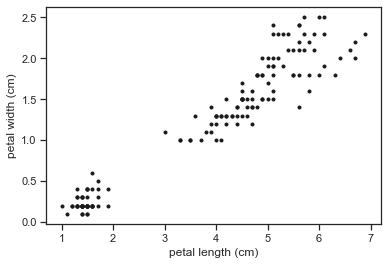

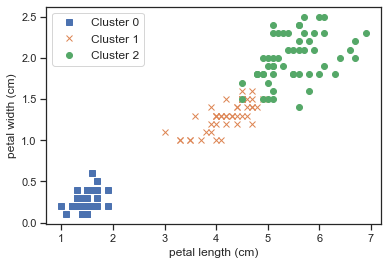

In [62]:
# Clustering iris data using a Gaussian mixture model (GMM)
import seaborn as sns

from sklearn.datasets import load_iris
#from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

iris = load_iris()
X = iris.data

fig, ax = plt.subplots()
idx1 = 2; idx2 = 3;
ax.scatter(X[:, idx1], X[:, idx2], c="k", marker=".")
ax.set(xlabel = iris.feature_names[idx1])
ax.set(ylabel = iris.feature_names[idx2])
#save_fig("iris-2d-unlabeled")
plt.show()


K = 3
y_pred = GaussianMixture(n_components=K, random_state=42).fit(X).predict(X)
mapping = np.array([2, 0, 1])
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

colors = sns.color_palette()[0:K]
markers = ('s', 'x', 'o', '^', 'v')
fig, ax = plt.subplots()
for k in range(0, K):
  ax.plot(X[y_pred==k, idx1], X[y_pred==k, idx2], color=colors[k], \
          marker=markers[k], linestyle = 'None', label="Cluster {}".format(k))
ax.set(xlabel = iris.feature_names[idx1])
ax.set(ylabel = iris.feature_names[idx2])
plt.legend(loc="upper left", fontsize=12)
#save_fig("iris-2d-gmm")
plt.show()

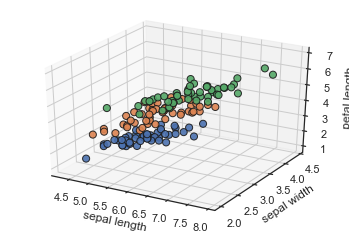

In [63]:
# Visualize raw 3d data

from sklearn.datasets import load_iris


from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
#https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

iris = load_iris()
X = iris.data 
y = iris.target

fig = plt.figure().gca(projection='3d')
colors = ['g', 'b', 'o']
for c in range(3):
  x0 = X[y==c,0]
  x1 = X[y==c,1]
  x2 = X[y==c,2]
  fig.scatter(x0, x1, x2, colors[c], edgecolors='k',s=50, alpha=0.9, \
              marker='o', label=iris.target_names[c])
fig.set_xlabel('sepal length')
fig.set_ylabel('sepal width')
fig.set_zlabel('petal length')
#plt.legend()
#save_fig("iris-3dscatterplot")
plt.show()

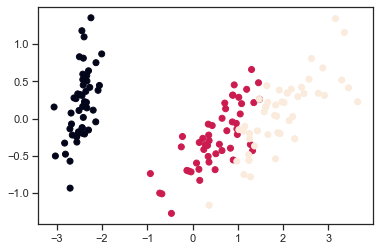

In [64]:
# 2d projection of points

from sklearn.decomposition import PCA

X = iris.data[:,0:3]
pca_xy = PCA(n_components=2).fit_transform(X)
fig, ax = plt.subplots()
ax.scatter(pca_xy[:,0], pca_xy[:,1], c=y)
#save_fig("iris-pca")
plt.show()

# probability

In [ ]:
# Univariate Gaussian (normal) 

from scipy.stats import norm 

rv = norm(0, 1) # standard normal


from scipy.stats import multivariate_normal as mvn

D = 5
onp.random.seed(42)
mu = onp.random.randn(D)
A = onp.random.randn(D,D)
Sigma = np.dot(A, A.T)

dist = mvn(mu, Sigma)
X = dist.rvs(size=10)
print(X.shape)

# optimization

In [65]:
import sklearn
import scipy
import scipy.optimize
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import itertools
import time
from functools import partial

import os


import numpy as np
from scipy.special import logsumexp
np.set_printoptions(precision=3)


# We make some wrappers around random number generation
# so it works even if we switch from numpy to JAX
import numpy as onp # original numpy

def set_seed(seed):
    onp.random.seed(seed)
    
def randn(*args):
    return onp.random.randn(*args)
        
def randperm(args):
    return onp.random.permutation(args)

In [66]:
import torch
import torchvision
print("torch version {}".format(torch.__version__))
if torch.cuda.is_available():
  print(torch.cuda.get_device_name(0))
  print("current device {}".format(torch.cuda.current_device()))
else:
  print("Torch cannot find GPU")

def set_seed(seed):
  onp.random.seed(seed)
  torch.manual_seed(seed)
  torch.cuda.manual_seed_all(seed)

use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
#torch.backends.cudnn.benchmark = True

torch version 1.0.1
Torch cannot find GPU


In [68]:
# Fit the model to a dataset, so we have an "interesting" parameter vector to use.

import sklearn.datasets
from sklearn.model_selection import train_test_split

iris = sklearn.datasets.load_iris()
X = iris["data"]
y = (iris["target"] == 2).astype(onp.int)  # 1 if Iris-Virginica, else 0'
N, D = X.shape # 150, 4


X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.33, random_state=42)

from sklearn.linear_model import LogisticRegression

# We set C to a large number to turn off regularization.
# We don't fit the bias term to simplify the comparison below.
log_reg = LogisticRegression(solver="lbfgs", C=1e5, fit_intercept=False)
log_reg.fit(X_train, y_train)
w_mle_sklearn = np.ravel(log_reg.coef_)
w = w_mle_sklearn
w

array([-4.414, -9.111,  6.539, 12.686])

In [69]:
## Compute gradient of loss "by hand" using numpy


def BCE_with_logits(logits, targets):
    N = logits.shape[0]
    logits = logits.reshape(N,1)
    logits_plus = np.hstack([np.zeros((N,1)), logits]) # e^0=1
    logits_minus = np.hstack([np.zeros((N,1)), -logits])
    logp1 = -logsumexp(logits_minus, axis=1)
    logp0 = -logsumexp(logits_plus, axis=1)
    logprobs = logp1 * targets + logp0 * (1-targets)
    return -np.sum(logprobs)/N

# Compute using numpy
def sigmoid(x): return 0.5 * (np.tanh(x / 2.) + 1)

def predict_logit(weights, inputs):
    return np.dot(inputs, weights) # Already vectorized

def predict_prob(weights, inputs):
    return sigmoid(predict_logit(weights, inputs))

def NLL(weights, batch):
    X, y = batch
    logits = predict_logit(weights, X)
    return BCE_with_logits(logits, y)

def NLL_grad(weights, batch):
    X, y = batch
    N = X.shape[0]
    mu = predict_prob(weights, X)
    g = np.sum(np.dot(np.diag(mu - y), X), axis=0)/N
    return g

y_pred = predict_prob(w, X_test)
loss = NLL(w, (X_test, y_test))
grad_np = NLL_grad(w, (X_test, y_test))
print("params {}".format(w))
#print("pred {}".format(y_pred))
print("loss {}".format(loss))
print("grad {}".format(grad_np))

params [-4.414 -9.111  6.539 12.686]
loss 0.11824007099618833
grad [-0.235 -0.122 -0.198 -0.064]


In [70]:
# AD in PyTorch 
# We just compute the objective, call backward() on it, and then lookup variable.grad. However, we have to specify the requires_grad=True attribute on the variable before computing the objective, so that Torch knows to record its values on its tape.

w_torch = torch.Tensor(np.reshape(w, [D, 1])).to(device)
w_torch.requires_grad_() 
x_test_tensor = torch.Tensor(X_test).to(device)
y_test_tensor = torch.Tensor(y_test).to(device)
y_pred = torch.sigmoid(torch.matmul(x_test_tensor, w_torch))[:,0]
criterion = torch.nn.BCELoss(reduction='mean')
loss_torch = criterion(y_pred, y_test_tensor)
loss_torch.backward()
grad_torch = w_torch.grad[:,0].cpu().numpy()
assert np.allclose(grad_np, grad_torch)

print("params {}".format(w_torch))
#print("pred {}".format(y_pred))
print("loss {}".format(loss_torch))
print("grad {}".format(grad_torch))

params tensor([[-4.4138],
        [-9.1106],
        [ 6.5387],
        [12.6857]], requires_grad=True)
loss 0.11824007332324982
grad [-0.235 -0.122 -0.198 -0.064]
